## Linear Classifier in TensorFlow 
Using Low Level API in Eager Execution mode

### Load tensorflow

In [0]:
import tensorflow as tf

In [0]:
#Enable Eager Execution if using tensflow version < 2.0
#From tensorflow v2.0 onwards, Eager Execution will be enabled by default


### Collect Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/drive/My Drive/11_Iris.csv')

In [0]:
data2 = pd.read_csv('/content/drive/My Drive/prices.csv')

### Check all columns in the dataset

In [45]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


### Drop columns `date` and  `symbol`

In [0]:
data2.drop(['date','symbol'], axis=1, inplace=True)

In [47]:
data2.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


### Consider only first 1000 rows in the dataset for building feature set and target set
Target 'Volume' has very high values. Divide 'Volume' by 1000,000

In [0]:
data_new = data2.iloc[:1000,:]

In [49]:
data_new.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


In [50]:
data_new.volume = data_new.volume.div(1000000)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Divide the data into train and test sets

In [0]:
from sklearn.model_selection import train_test_split

In [52]:
data_new.shape

(1000, 5)

In [0]:
import numpy as np

In [0]:
x=data_new[['open','close','low','high']]
y=data_new['volume']

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=4)


In [0]:
#Convert Training and Test Datato Numpy float32 arays
#Convert Training and Test Datato Numpy float32 arays

In [0]:
xtrain = np.float32(xtrain)
xtest = np.float32(xtest)
ytrain = np.float32(ytrain)
ytest = np.float32(ytest)

### Normalize the data
You can use Normalizer from sklearn.preprocessing

In [0]:
from sklearn import preprocessing

In [0]:
xtrain_norm = preprocessing.normalize(xtrain, norm='l2')

In [0]:
xtest_norm = preprocessing.normalize(xtest, norm='l2')

In [60]:
xtrain_norm

array([[0.4967648 , 0.5027116 , 0.4967648 , 0.50371665],
       [0.4989744 , 0.50018555, 0.49473557, 0.5060392 ],
       [0.49402478, 0.5091425 , 0.48619598, 0.5102223 ],
       ...,
       [0.5000676 , 0.49990803, 0.49790606, 0.50210947],
       [0.50201964, 0.49833545, 0.4974043 , 0.50222206],
       [0.4946981 , 0.5058178 , 0.49348584, 0.50585955]], dtype=float32)

## Building the Model in tensorflow

1.Define Weights and Bias, use tf.zeros to initialize weights and Bias

In [0]:
x_ = tf.placeholder(dtype=tf.float32, name='x-input')

x_n = tf.nn.l2_normalize(x_,1)

y_ = tf.placeholder(dtype=tf.float32, name='y-input')

In [0]:
W = tf.Variable(tf.random_normal(shape=[4,1]), name="Weights")
b = tf.Variable(tf.zeros(shape=[1]),name="Bias")

2.Define a function to calculate prediction

In [0]:
ys = tf.add(tf.matmul(x_n,W),b,name='output')

3.Loss (Cost) Function [Mean square error]

In [0]:
loss = tf.reduce_mean(tf.square(ys-y_),name='Loss')

4.Function to train the Model

1.   Record all the mathematical steps to calculate Loss
2.   Calculate Gradients of Loss w.r.t weights and bias
3.   Update Weights and Bias based on gradients and learning rate to minimize loss

In [0]:
#Lets start graph Execution
sess = tf.Session()

# variables need to be initialized before we can use them
sess.run(tf.global_variables_initializer())

In [0]:
train_op = tf.train.GradientDescentOptimizer(0.03).minimize(loss)

## Train the model for 100 epochs 
1. Observe the training loss at every iteration
2. Observe Train loss at every 5th iteration

In [0]:
#how many times data need to be shown to model
training_epochs = 100

In [108]:
for epoch in range(training_epochs):
            
    #Calculate train_op and loss
    _, train_loss = sess.run([train_op,loss],feed_dict={x_:xtrain_norm, y_:ytrain})
    
    if epoch % 5 == 0:
        print ('Training loss at step: ', epoch, ' is ', train_loss)

('Training loss at step: ', 0, ' is ', 215.97371)
('Training loss at step: ', 5, ' is ', 200.649)
('Training loss at step: ', 10, ' is ', 196.3809)
('Training loss at step: ', 15, ' is ', 195.19218)
('Training loss at step: ', 20, ' is ', 194.86113)
('Training loss at step: ', 25, ' is ', 194.76892)
('Training loss at step: ', 30, ' is ', 194.74321)
('Training loss at step: ', 35, ' is ', 194.73608)
('Training loss at step: ', 40, ' is ', 194.73407)
('Training loss at step: ', 45, ' is ', 194.73355)
('Training loss at step: ', 50, ' is ', 194.73338)
('Training loss at step: ', 55, ' is ', 194.73335)
('Training loss at step: ', 60, ' is ', 194.73332)
('Training loss at step: ', 65, ' is ', 194.73332)
('Training loss at step: ', 70, ' is ', 194.73332)
('Training loss at step: ', 75, ' is ', 194.73332)
('Training loss at step: ', 80, ' is ', 194.73334)
('Training loss at step: ', 85, ' is ', 194.73332)
('Training loss at step: ', 90, ' is ', 194.73332)
('Training loss at step: ', 95, ' is

### Get the shapes and values of W and b

In [111]:
print (W.shape)
sess.run(W)

(4, 1)


array([[ 2.630128  ],
       [-0.53380036],
       [ 2.638067  ],
       [ 1.1360152 ]], dtype=float32)

In [112]:
print (b.shape)
sess.run(b)

(1,)


array([2.3044198], dtype=float32)

### Model Prediction on 1st Examples in Test Dataset

In [0]:
y_pred = tf.add(tf.matmul(xtest_norm[0:1],W),b)

In [117]:
sess.run(y_pred)

array([[5.2244844]], dtype=float32)

## Classification using tf.Keras

In this exercise, we will build a Deep Neural Network using tf.Keras. We will use Iris Dataset for this exercise.

### Load the given Iris data using pandas (Iris.csv)

In [0]:
iris = data

In [119]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Target set has different categories. So, Label encode them. And convert into one-hot vectors using get_dummies in pandas.

In [120]:
print(iris.info())
print(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [0]:
iris = iris.drop("Id", axis=1)
iris_1 = iris.join(pd.get_dummies(iris["Species"]))

In [122]:
iris_1 = iris_1.drop("Species", axis=1)
iris_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### Splitting the data into feature set and target set

In [0]:
cols = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
feature = iris_1.drop(cols, axis=1)
target = iris_1[cols]

In [124]:
print(feature.head())
print(target.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


###  Building Model in tf.keras

Build a Linear Classifier model  <br>
1.  Use Dense Layer  with input shape of 4 (according to the feature set) and number of outputs set to 3<br> 
2. Apply Softmax on Dense Layer outputs <br>
3. Use SGD as Optimizer
4. Use categorical_crossentropy as loss function 

In [125]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

W0721 11:57:34.677016 140190130624384 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 11:57:34.680272 140190130624384 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 11:57:34.688694 140190130624384 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 11:57:34.710283 140190130624384 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 11:57:34.909998 140190130624384 deprecation_wrappe

In [0]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.3, random_state=5)

### Model Training 

In [127]:
hist = model.fit(X_train, y_train, epochs=150, batch_size=10)

W0721 11:58:17.729062 140190130624384 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 11:58:17.775255 140190130624384 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/150
105/105 [==============================] - 0s 2ms/step - loss: 1.7724
Epoch 2/150
105/105 [==============================] - 0s 145us/step - loss: 1.2834
Epoch 3/150
105/105 [==============================] - 0s 138us/step - loss: 1.1226
Epoch 4/150
105/105 [==============================] - 0s 137us/step - loss: 1.0392
Epoch 5/150
105/105 [==============================] - 0s 126us/step - loss: 0.9921
Epoch 6/150
105/105 [==============================] - 0s 130us/step - loss: 0.9321
Epoch 7/150
105/105 [==============================] - 0s 133us/step - loss: 0.8906
Epoch 8/150
105/105 [==============================] - 0s 131us/step - loss: 0.8478
Epoch 9/150
105/105 [==============================] - 0s 125us/step - loss: 0.8197
Epoch 10/150
105/105 [==============================] - 0s 130us/step - loss: 0.7796
Epoch 11/150
105/105 [==============================] - 0s 134us/step - loss: 0.7623
Epoch 12/150
105/105 [==============================] - 0s 137us/step - loss

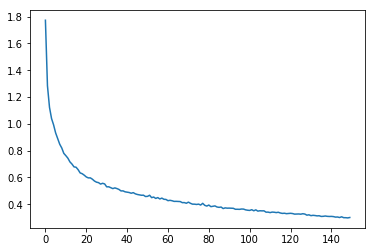

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])

### Model Prediction

In [129]:
model.predict(X_test)

array([[6.2708594e-02, 6.9011241e-01, 2.4717899e-01],
       [1.2318341e-03, 4.8754233e-01, 5.1122588e-01],
       [3.4244405e-03, 9.7752228e-02, 8.9882338e-01],
       [9.4049311e-01, 5.8867913e-02, 6.3899049e-04],
       [3.0899667e-03, 1.8323639e-01, 8.1367362e-01],
       [1.0672783e-01, 6.7434305e-01, 2.1892907e-01],
       [9.0274382e-01, 9.6078709e-02, 1.1774689e-03],
       [2.7374571e-02, 4.4919580e-01, 5.2342957e-01],
       [8.5778183e-01, 1.4043272e-01, 1.7855327e-03],
       [3.2502588e-02, 5.6068945e-01, 4.0680799e-01],
       [3.3318840e-02, 5.7320118e-01, 3.9347997e-01],
       [6.2143174e-03, 5.3384972e-01, 4.5993596e-01],
       [1.4544571e-03, 2.4087958e-01, 7.5766599e-01],
       [5.3510052e-04, 3.5639003e-01, 6.4307487e-01],
       [9.3620467e-01, 6.2962063e-02, 8.3339936e-04],
       [9.1894501e-01, 7.9536855e-02, 1.5181222e-03],
       [7.5529455e-03, 3.4188670e-01, 6.5056032e-01],
       [6.6294370e-04, 2.9723760e-01, 7.0209950e-01],
       [9.6740144e-01, 3.231

### Save the Model

In [130]:
scores = model.evaluate(X_test, y_test)
print("score=", scores)

45/45 [==============================] - 0s 702us/step
('score=', 0.29318226642078826)


In [0]:
model.save("iris.h5")

### Build and Train a Deep Neural network with 2 hidden layer  - Optional - For Practice

Does it perform better than Linear Classifier? What could be the reason for difference in performance?

In [132]:
model2 = Sequential()
model2.add(Dense(3, input_dim=4, activation='softmax'))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd')
hist = model2.fit(X_train, y_train, epochs=600, batch_size=10)

Epoch 1/600
105/105 [==============================] - 0s 2ms/step - loss: 1.1216
Epoch 2/600
105/105 [==============================] - 0s 150us/step - loss: 1.0916
Epoch 3/600
105/105 [==============================] - 0s 161us/step - loss: 1.0572
Epoch 4/600
105/105 [==============================] - 0s 151us/step - loss: 1.0239
Epoch 5/600
105/105 [==============================] - 0s 150us/step - loss: 1.0043
Epoch 6/600
105/105 [==============================] - 0s 165us/step - loss: 0.9855
Epoch 7/600
105/105 [==============================] - 0s 158us/step - loss: 0.9715
Epoch 8/600
105/105 [==============================] - 0s 142us/step - loss: 0.9560
Epoch 9/600
105/105 [==============================] - 0s 154us/step - loss: 0.9407
Epoch 10/600
105/105 [==============================] - 0s 158us/step - loss: 0.9286
Epoch 11/600
105/105 [==============================] - 0s 127us/step - loss: 0.9171
Epoch 12/600
105/105 [==============================] - 0s 148us/step - loss

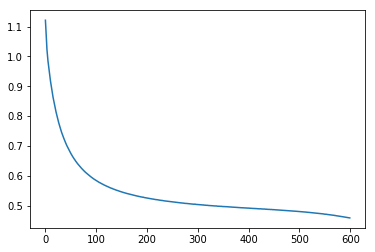

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])

In [134]:
scores = model2.evaluate(X_test, y_test)
print("score=", scores)

45/45 [==============================] - 0s 1ms/step
('score=', 0.46191936863793265)
